In [10]:
import keras
keras.__version__

'2.2.4'

In [11]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [12]:
train_data.shape

(25000,)

In [13]:
max(max(seq) for seq in train_data)

9999

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for key,value in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 11s 7us/step


In [16]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
from keras import layers
from keras import models

In [60]:
model = models.Sequential()

In [61]:
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [35]:
# using custom loss and optimizer for training

# from keras import optimizers
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])

In [63]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1353 - acc: 0.9579 - val_loss: 0.2855 - val_acc: 0.8877
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1153 - acc: 0.9639 - val_loss: 0.2982 - val_acc: 0.8840
Epoch 3/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.0924 - acc: 0.9725 - val_loss: 0.3237 - val_acc: 0.8813
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0748 - acc: 0.9796 - val_loss: 0.3404 - val_acc: 0.8782
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0652 - acc: 0.9819 - val_loss: 0.3665 - val_acc: 0.8784
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0550 - acc: 0.9851 - val_loss: 0.3897 - val_acc: 0.8768
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.0422 - acc: 0.9902 - val_loss: 0.4339 - 

In [70]:
history_dict = history.history

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

Text(0.5, 1.0, 'Loss during Training and Validation')

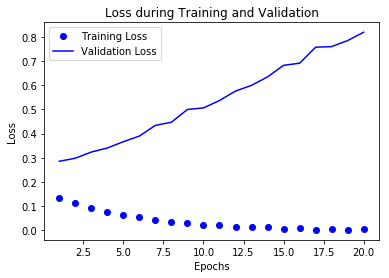

In [72]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during Training and Validation')

Text(0.5, 1.0, 'Accuracy during Training and Validation')

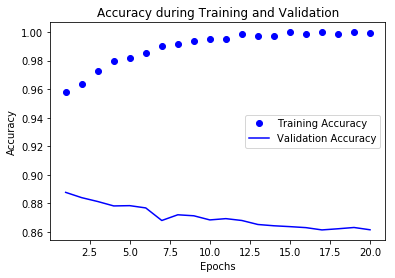

In [73]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training and Validation')

In [75]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 134us/step


In [76]:
results

[0.9036410574793816, 0.84468]

In [77]:
model.predict(x_test)

array([[2.0090251e-03],
       [1.0000000e+00],
       [9.8967910e-01],
       ...,
       [3.7067075e-04],
       [3.5634825e-03],
       [5.5380487e-01]], dtype=float32)

In [83]:
# Experimentations

exp_model = models.Sequential()

exp_model.add(layers.Dense(40, activation='tanh', input_shape=(10000,)))
exp_model.add(layers.Dense(20, activation='tanh'))
exp_model.add(layers.Dense(1, activation='sigmoid'))

In [84]:
exp_model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [85]:
exp_history = exp_model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=5, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 122us/step - loss: 0.1520 - acc: 0.7871 - val_loss: 0.1046 - val_acc: 0.8647
Epoch 2/5
15000/15000 [==============================] - 2s 103us/step - loss: 0.0720 - acc: 0.9106 - val_loss: 0.0823 - val_acc: 0.8889
Epoch 3/5
15000/15000 [==============================] - 2s 103us/step - loss: 0.0504 - acc: 0.9378 - val_loss: 0.0838 - val_acc: 0.8862
Epoch 4/5
15000/15000 [==============================] - 2s 104us/step - loss: 0.0383 - acc: 0.9519 - val_loss: 0.0954 - val_acc: 0.8751
Epoch 5/5
15000/15000 [==============================] - 2s 104us/step - loss: 0.0322 - acc: 0.9615 - val_loss: 0.1014 - val_acc: 0.8689


In [86]:
exp_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 75us/step


[0.11222632730007172, 0.8566]